# EXPLORE EXERCISES

----

In [111]:
# import libraries

import pandas as pd
import requests
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#import data set

from vega_datasets import data
from io import StringIO
from acquire import items_, stores_, sales_, merge_dataframes, pull_csv
from prepare import prep_store, prep_csv, plot_variables

# warnings

import warnings

# graphing parameters

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = prep_store()

In [5]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (913000, 16)


In [7]:
df.head(1)

,item_id,item_brand,item_name,item_price,sale_amount,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,January,10.92


In [8]:
# check shape of data
df.shape

(913000, 16)

In [9]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

639100

In [10]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [12]:
# lets plot train and test

train.head(1)

,item_id,item_brand,item_name,item_price,sale_amount,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,January,10.92


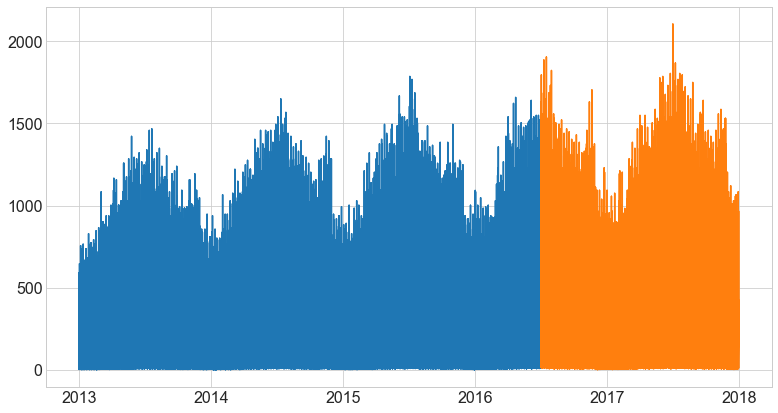

In [14]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

### Let's focus on train only

In [16]:
# create a series called 'y'

y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

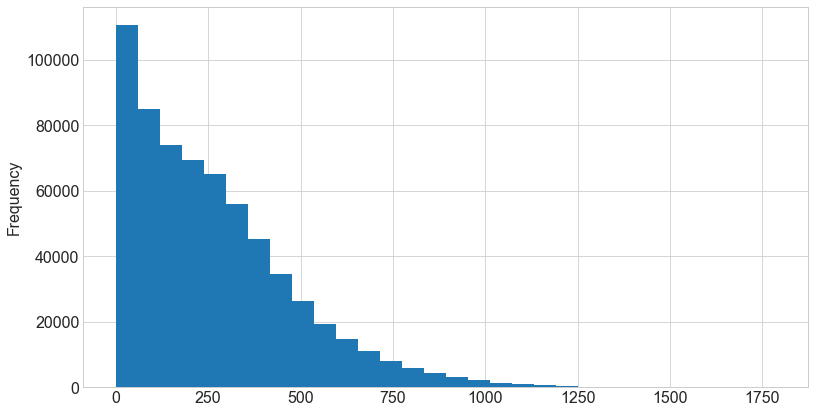

In [19]:
# plot a histogram of sales total
y.plot.hist(bins=30)

In [20]:
y.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='sale_date', length=639100)

In [21]:
train['month'] = y.index.month

<ipython-input-21-6944ed8e700e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [23]:
# look at avearge total sales by month 

train.groupby('month').sales_total.mean()

month
1     185.232810
2     205.001723
3     246.694359
4     286.463914
5     308.932679
6     328.098415
7     334.286789
8     297.654839
9     274.558847
10    255.857997
11    277.170912
12    195.726292
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='month'>

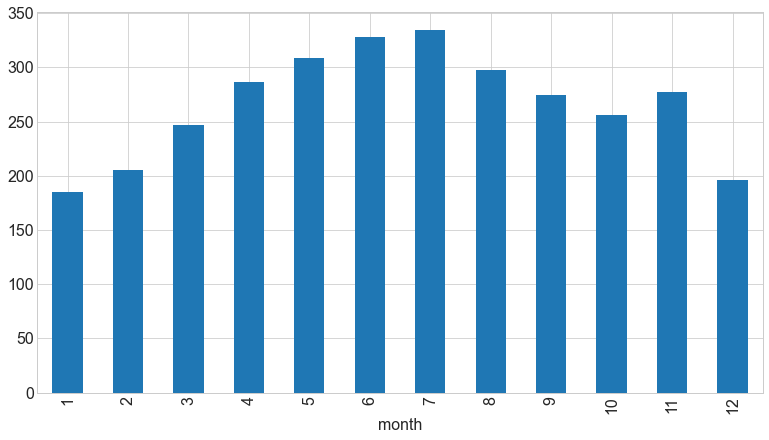

In [24]:
# Plot mean total_sales by month (bar plot)

train.groupby('month').sales_total.mean().plot.bar()

In [25]:
train['weekday'] = y.index.day_name()

<ipython-input-25-e5c6cdb7c1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [26]:
# Plot mean sales total by weekday

train.groupby('weekday').sales_total.mean()

weekday
Friday       281.056613
Monday       210.685340
Saturday     298.254733
Sunday       316.161735
Thursday     262.997190
Tuesday      245.186367
Wednesday    245.600530
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='weekday'>

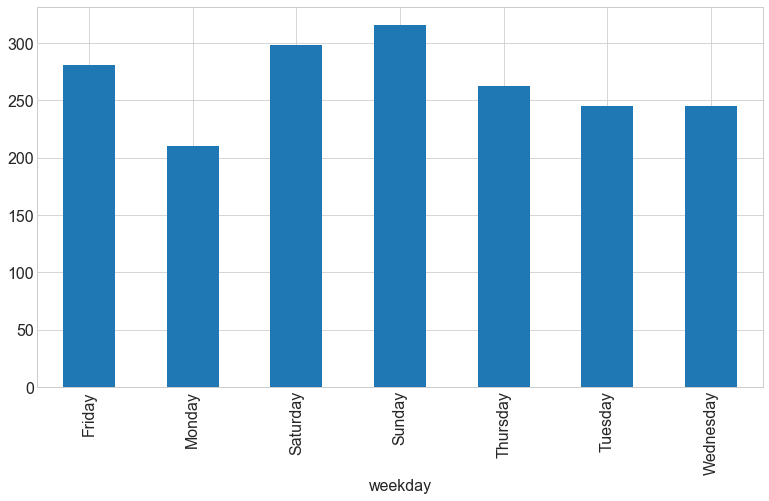

In [27]:
train.groupby('weekday').sales_total.mean().plot.bar()

In [28]:
train.groupby('weekday').describe()

item_id                                                     \
             count       mean        std  min   25%   50%   75%   max   
weekday                                                                 
Friday     91500.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   
Monday     91000.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   
Saturday   91100.0  25.499221  14.430769  1.0  13.0  25.0  38.0  50.0   
Sunday     91000.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   
Thursday   91500.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   
Tuesday    91500.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   
Wednesday  91500.0  25.500000  14.430949  1.0  13.0  25.5  38.0  50.0   

          item_price            ... month       sales_total              \
               count      mean  ...   75%   max       count        mean   
weekday                         ...                                       
Friday       91500.0  5.160400  ...   9.0  12.0     91500.0  281.056613   
Monday       91000.0  5.160400  ...   9.0  12.0     91000.0  210.685340   
Saturday     91100.0  5.160133  ...   9.0  12.0     91100.0  298.254733   
Sunday       91000.0  5.160400  ...   9.0  12.0     91000.0  316.161735   
Thursday     91500.0  5.160400  ...   9.0  12.0     91500.0  262.997190   
Tuesday      91500.0  5.160400  ...   9.0  12.0     91500.0  245.186367   
Wednesday    91500.0  5.160400  ...   9.0  12.0     91500.0  245.600530   

                                                                
                  std   min       25%     50%     75%      max  
weekday                                                         
Friday     222.923667  3.00  100.0800  238.05  403.88  1521.37  
Monday     167.709196  1.68   74.2500  176.82  303.48  1266.29  
Saturday   235.982953  4.20  106.7800  252.00  429.66  1767.34  
Sunday     249.753344  4.20  112.7700  268.28  453.60  1785.56  
Thursday   209.162898  0.84   93.0800  221.13  378.16  1530.48  
Tuesday    194.784248  1.68   87.5475  207.04  353.40  1439.38  
Wednesday  195.155719  0.00   87.4800  207.60  353.44  1384.72  

[7 rows x 56 columns]

<AxesSubplot:xlabel='month', ylabel='sales_total'>

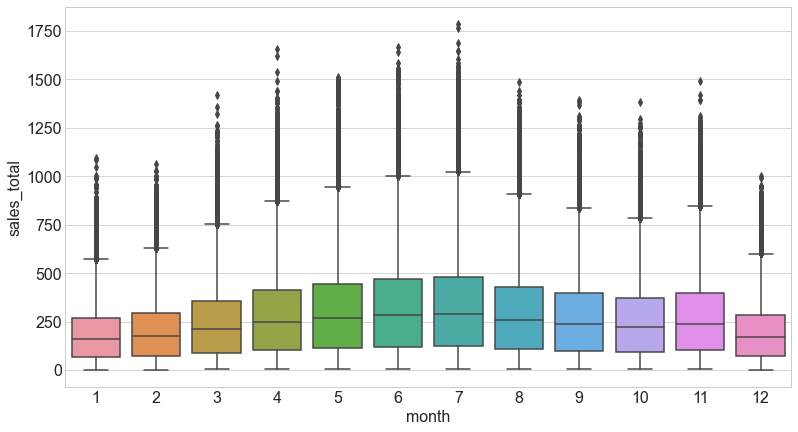

In [32]:
sns.boxplot(data = train, x = 'month', y = 'sales_total')

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

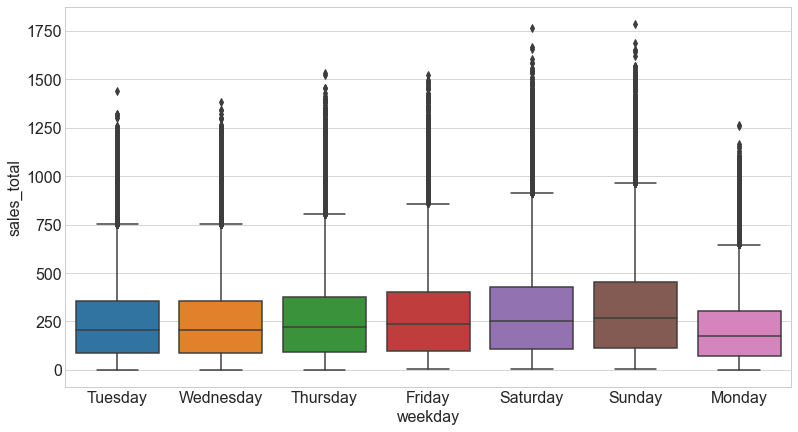

In [33]:
sns.boxplot(data = train, x = 'weekday', y = 'sales_total')

----

### Visualize the target over time

---

<AxesSubplot:xlabel='sale_date'>

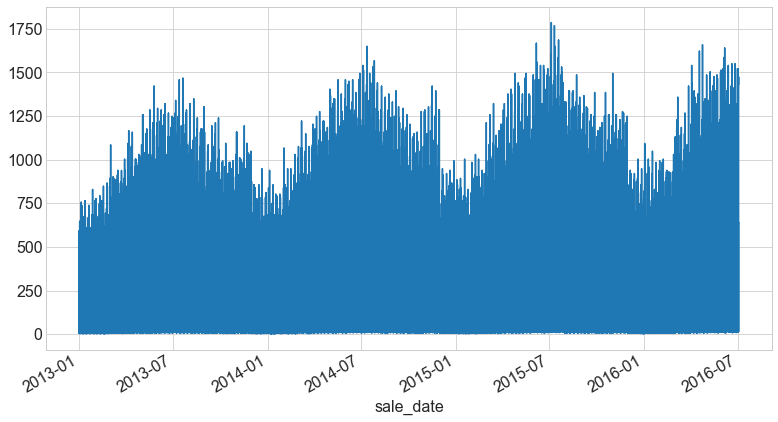

In [34]:
y.plot()

In [38]:
y.resample('2W').mean()

sale_date
2013-01-06    163.589167
2013-01-20    158.963961
2013-02-03    163.065199
2013-02-17    176.570130
2013-03-03    184.684941
                 ...    
2016-05-08    335.822039
2016-05-22    343.591659
2016-06-05    352.314723
2016-06-19    367.854509
2016-07-03    361.649772
Freq: 2W-SUN, Name: sales_total, Length: 92, dtype: float64

<AxesSubplot:title={'center':'2 Week Average'}, xlabel='sale_date'>

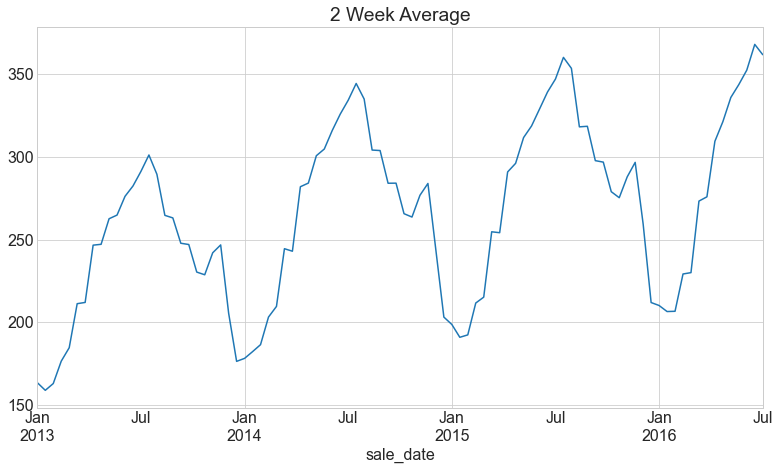

In [39]:
y.resample('2W').mean().plot(title='2 Week Average')

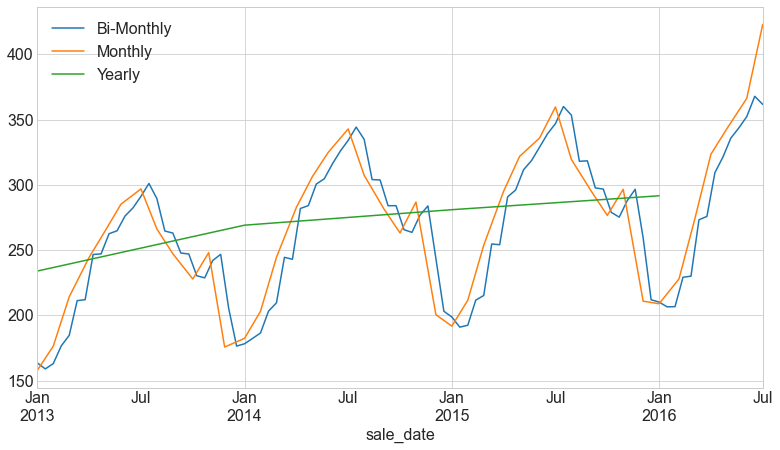

In [40]:
y.resample('2W').mean().plot(label = 'Bi-Monthly')
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

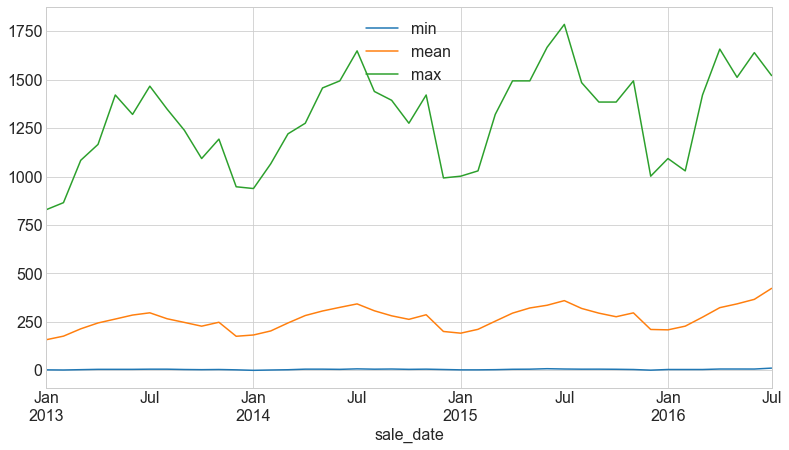

In [41]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

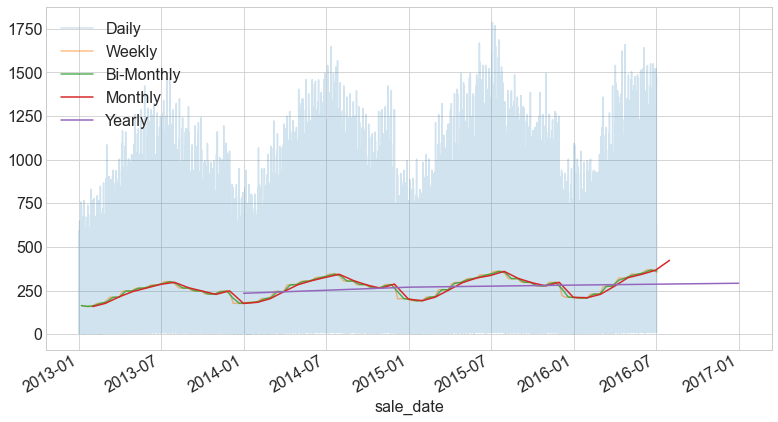

In [43]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('2W').mean().plot(alpha=.8, label='Bi-Monthly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in sales total'}, xlabel='sale_date'>

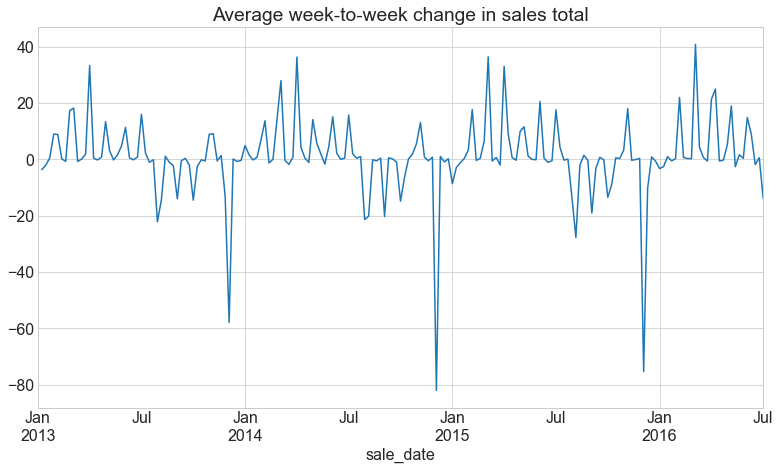

In [44]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales total')

<AxesSubplot:title={'center':'Average month-to-month change in total sales'}, xlabel='sale_date'>

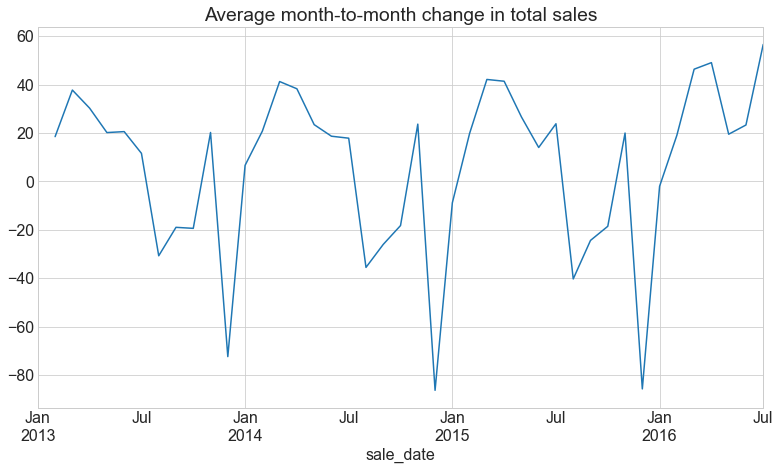

In [45]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in total sales')

In [46]:

y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,422.947300
8,266.183375,307.345466,319.435676,NaN
9,247.237694,281.350430,295.088416,NaN


<AxesSubplot:xlabel='sale_date'>

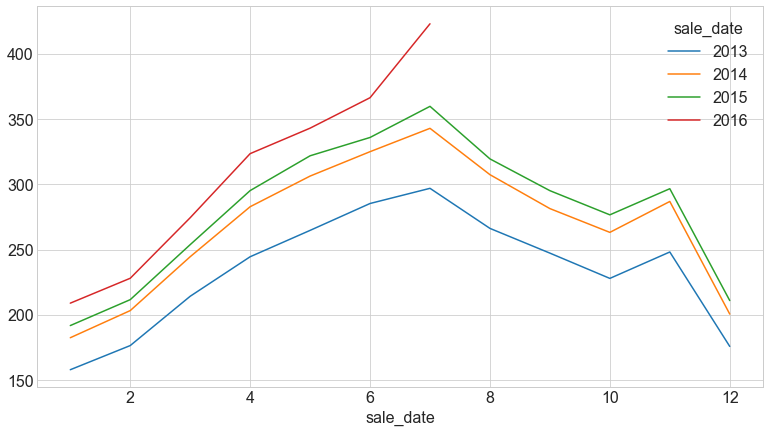

In [47]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Auto Correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

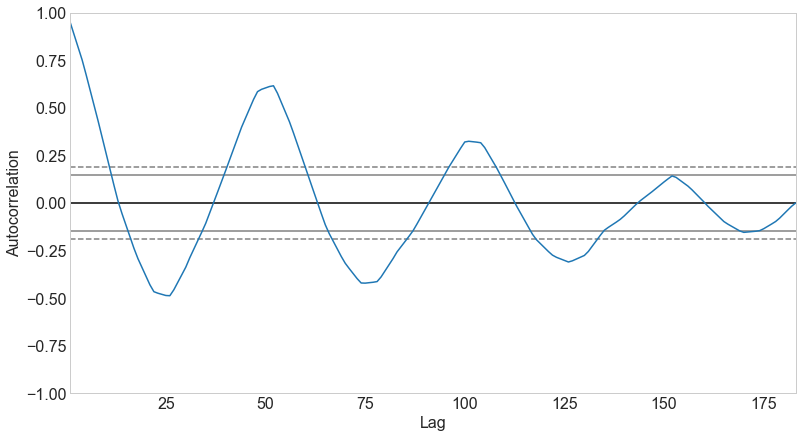

In [49]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

-------

## Germany Alt Power Dataset

---

In [50]:
df = prep_csv()

In [51]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [52]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


In [54]:
df.shape

(4383, 6)

In [56]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

3068

In [61]:
df.columns.to_list()

['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month', 'year']

In [57]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

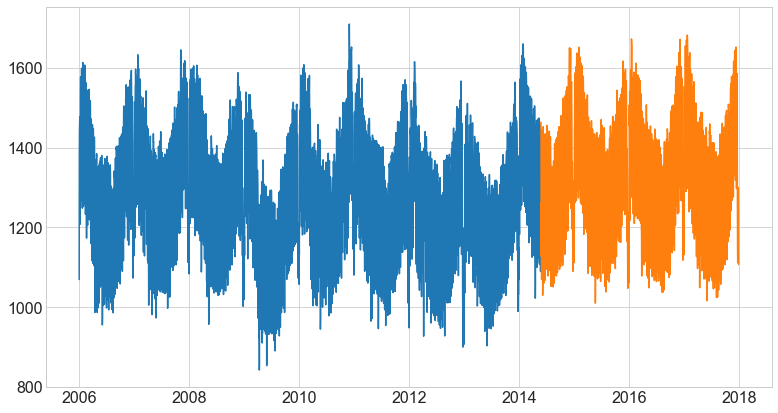

In [62]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.show()

In [64]:
# create a series called 'y'

y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

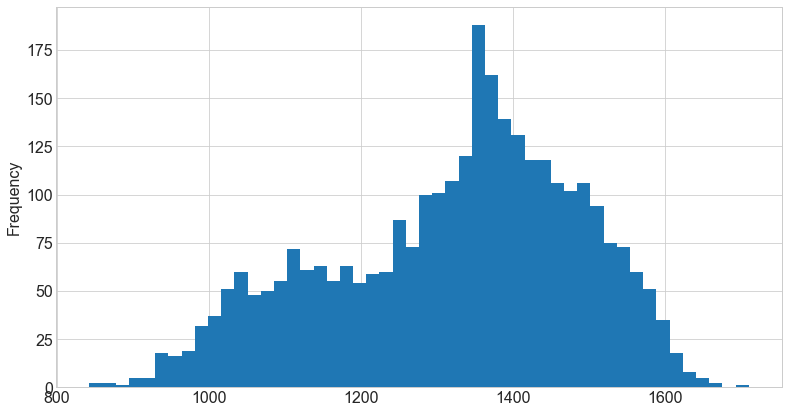

In [66]:
# plot a histogram of temperature
y.plot.hist(bins=50)

In [67]:
# look at avearge temp by month 

train.groupby('month').Consumption.mean()

month
April        1281.894344
August       1231.047016
December     1353.447411
February     1435.979480
January      1414.817659
July         1239.813202
June         1236.551471
March        1363.463068
May          1248.007920
November     1407.543962
October      1338.826234
September    1298.845092
Name: Consumption, dtype: float64

<AxesSubplot:xlabel='month'>

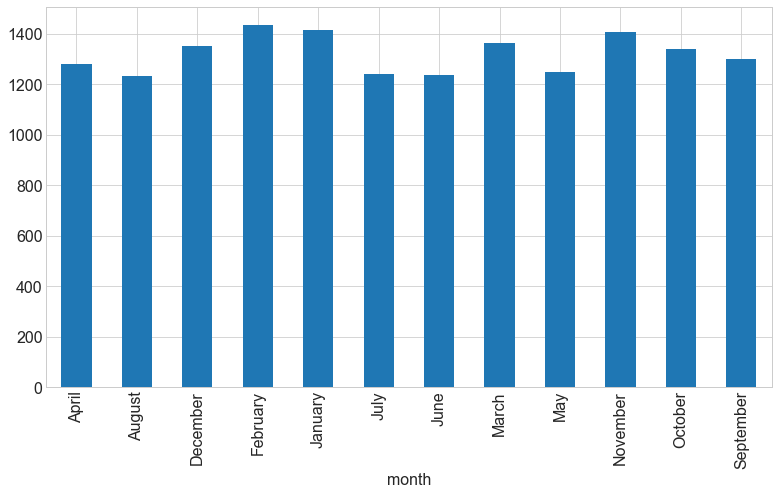

In [68]:
# Plot mean temperature by month (bar plot)

train.groupby('month').Consumption.mean().plot.bar()

In [69]:
train['weekday'] = y.index.day_name()

<ipython-input-69-e5c6cdb7c1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [71]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,weekday
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,Thursday


In [73]:
# Plot mean temperature by weekday

train.groupby('weekday').Consumption.mean()

weekday
Friday       1377.622438
Monday       1372.330180
Saturday     1186.480824
Sunday       1086.936861
Thursday     1403.917388
Tuesday      1409.525443
Wednesday    1414.895566
Name: Consumption, dtype: float64

<AxesSubplot:xlabel='weekday'>

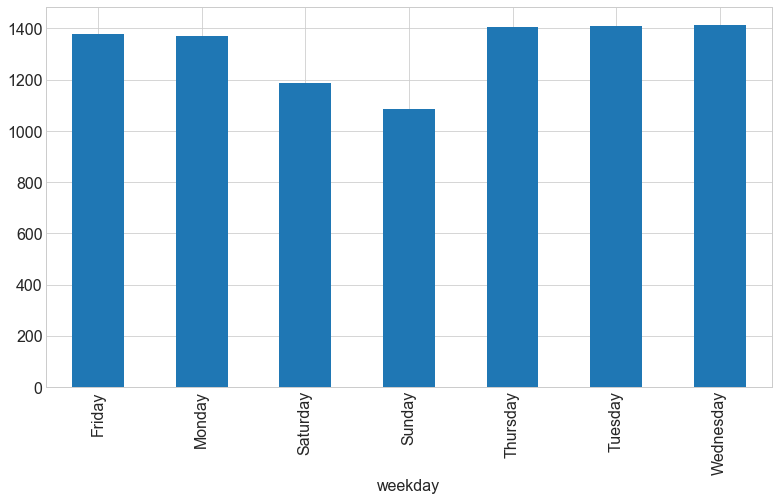

In [74]:
train.groupby('weekday').Consumption.mean().plot.bar()

In [75]:
train.groupby('weekday').describe()

Consumption                                                \
                count         mean         std      min         25%   
weekday                                                               
Friday          438.0  1377.622438  117.859975  910.081  1307.69425   
Monday          439.0  1372.330180  129.555427  860.508  1318.04750   
Saturday        438.0  1186.480824   96.939306  941.343  1110.62300   
Sunday          439.0  1086.936861   92.635640  842.395  1023.13450   
Thursday        438.0  1403.917388  122.955230  939.397  1346.16100   
Tuesday         438.0  1409.525443  112.492853  899.827  1346.76875   
Wednesday       438.0  1414.895566  109.731340  909.618  1352.75650   

                                             Wind             ... Wind+Solar  \
                 50%         75%       max  count       mean  ...        75%   
weekday                                                       ...              
Friday     1379.1455  1463.60075  1632.587  438.0  65.785623  ...  102.79100   
Monday     1379.5920  1455.76700  1617.784  439.0  61.895383  ...  111.16050   
Saturday   1175.4980  1256.42600  1445.663  438.0  67.807637  ...  101.93325   
Sunday     1072.7260  1156.54900  1329.448  439.0  67.346089  ...  114.50450   
Thursday   1408.6185  1490.42775  1664.896  438.0  65.182372  ...   94.11825   
Tuesday    1405.2970  1489.22250  1645.804  438.0  60.444936  ...   87.28300   
Wednesday  1411.4290  1491.65050  1709.568  438.0  59.994276  ...   85.80275   

                     year                                                 \
               max  count         mean       std     min     25%     50%   
weekday                                                                    
Friday     575.213  438.0  2009.716895  2.433977  2006.0  2008.0  2010.0   
Monday     571.518  439.0  2009.715262  2.437065  2006.0  2008.0  2010.0   
Saturday   557.538  438.0  2009.719178  2.434712  2006.0  2008.0  2010.0   
Sunday     572.455  439.0  2009.712984  2.440074  2006.0  2008.0  2010.0   
Thursday   576.595  438.0  2009.714612  2.434180  2006.0  2008.0  2010.0   
Tuesday    560.621  438.0  2009.710046  2.431758  2006.0  2008.0  2010.0   
Wednesday  514.485  438.0  2009.712329  2.435320  2006.0  2008.0  2010.0   

                           
              75%     max  
weekday                    
Friday     2012.0  2014.0  
Monday     2012.0  2014.0  
Saturday   2012.0  2014.0  
Sunday     2012.0  2014.0  
Thursday   2012.0  2014.0  
Tuesday    2012.0  2014.0  
Wednesday  2012.0  2014.0  

[7 rows x 40 columns]

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

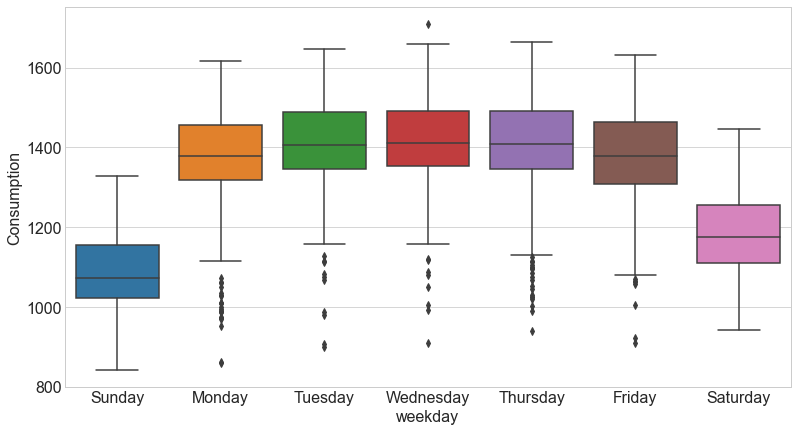

In [76]:
sns.boxplot(data = train, x = 'weekday', y = 'Consumption')

<AxesSubplot:xlabel='month', ylabel='Consumption'>

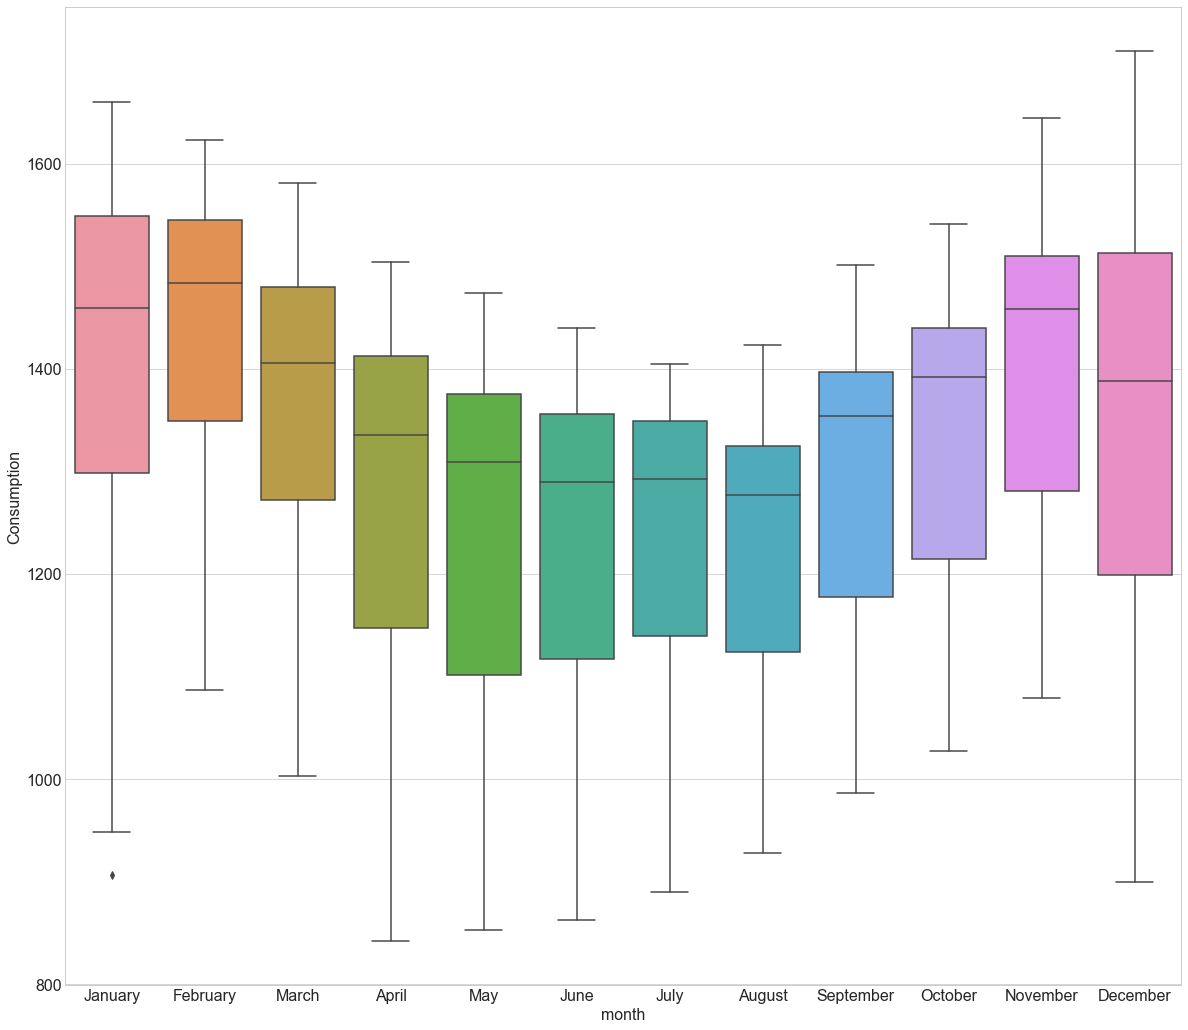

In [79]:
# Anything interesting in the chart above?

# Would the monthly boxplot look different?
plt.figure(figsize=(20,18))
sns.boxplot(data = train, x = 'month', y = 'Consumption')

<AxesSubplot:title={'center':'Weekly Average'}, xlabel='Date'>

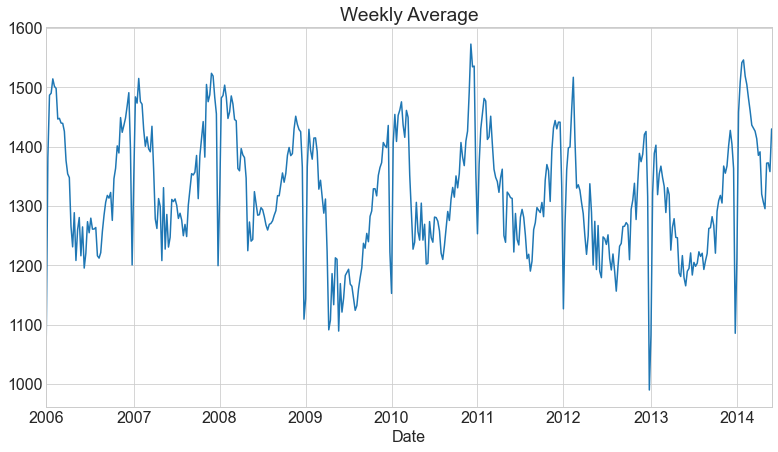

In [81]:
y.resample('W').mean().plot(title='Weekly Average')

<AxesSubplot:title={'center':'Bi-Monthly Average'}, xlabel='Date'>

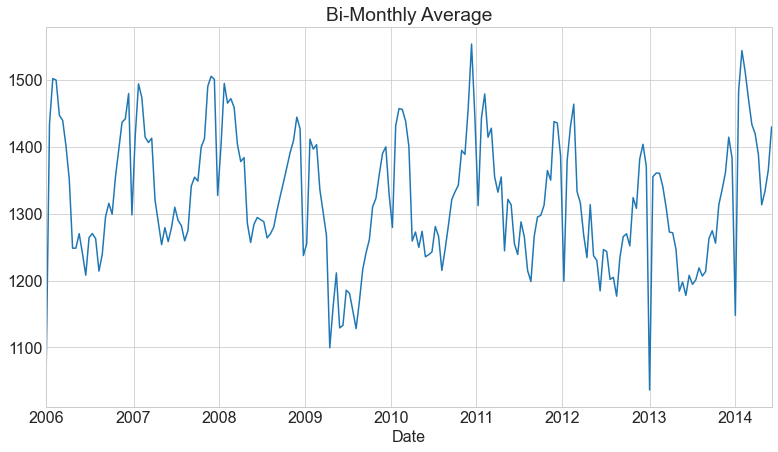

In [82]:
y.resample('2W').mean().plot(title='Bi-Monthly Average')

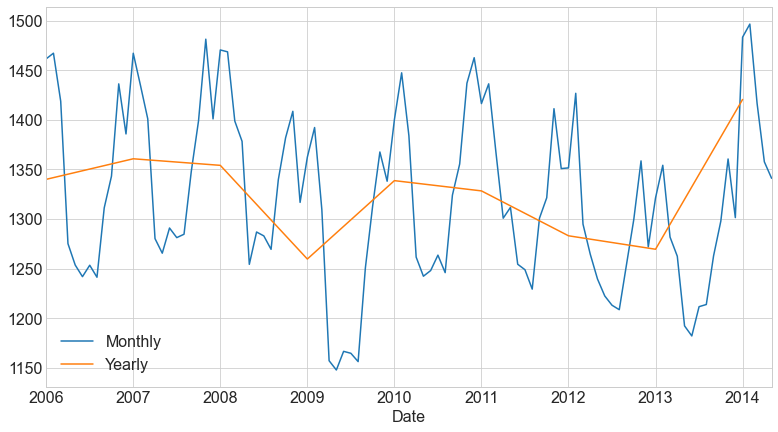

In [83]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='Date'>

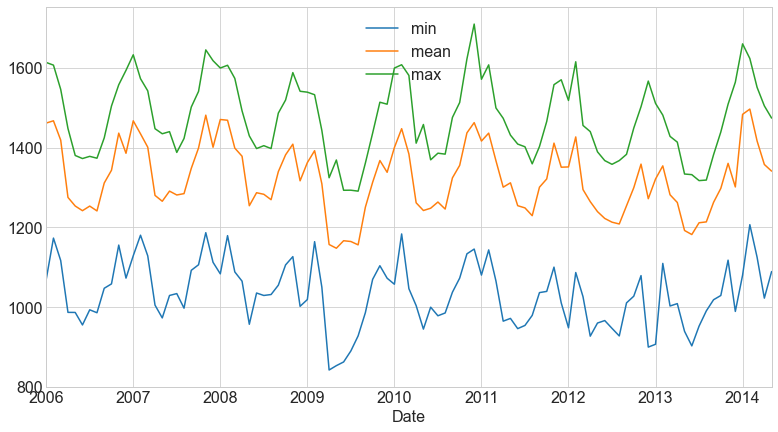

In [84]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

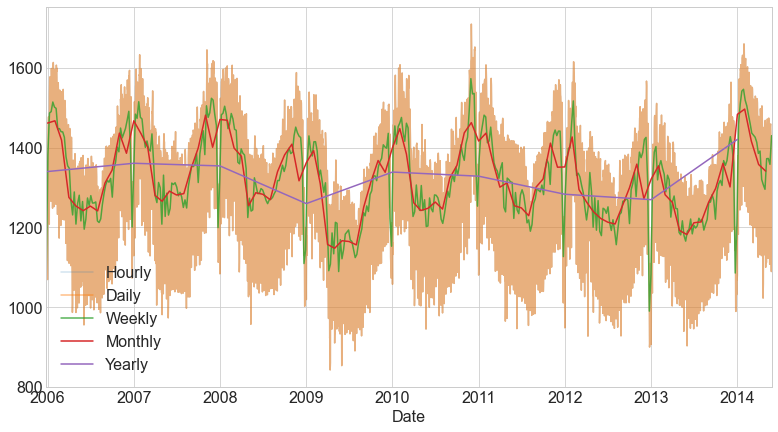

In [85]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

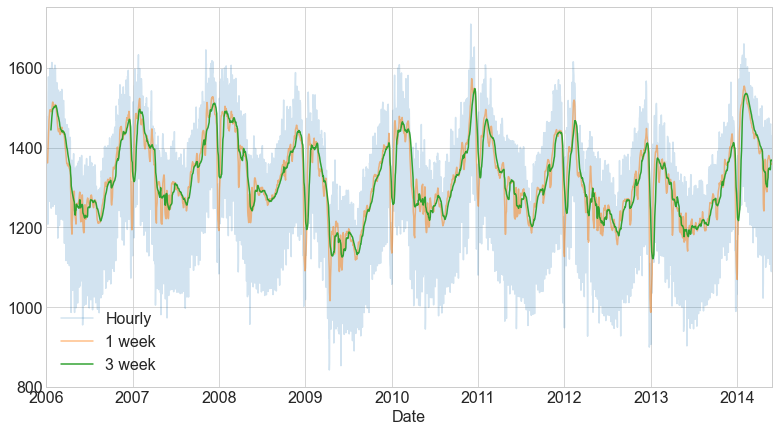

In [88]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonaility to Trend

y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(21).mean().plot(alpha=8, label='3 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in cosumption'}, xlabel='Date'>

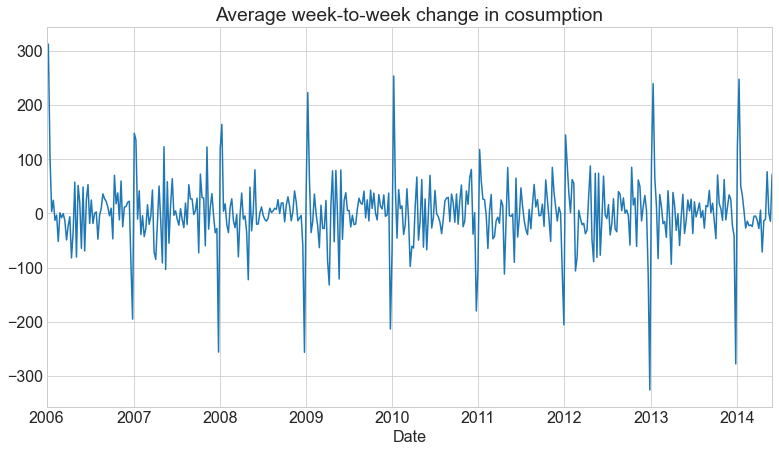

In [89]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in cosumption')

<AxesSubplot:title={'center':'Average month-to-month change in cosumption'}, xlabel='Date'>

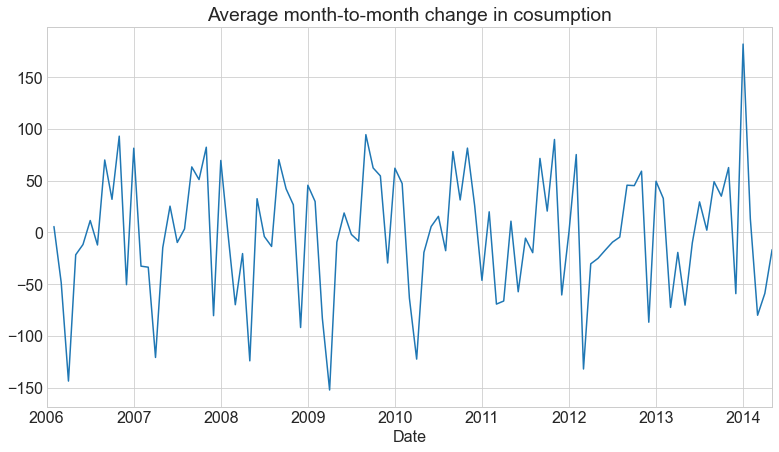

In [90]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in cosumption')

### Seasonal Plot
- comparison of multiple years together.

In [91]:

y.groupby([y.index.year, y.index.month]).mean().unstack(0)

Date,2006,2007,2008,2009,2010,2011,2012,2013,2014
Date,,,,,,,,,
1,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935,1483.261323
2,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429,1496.465536
3,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581,1416.458355
4,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967,1357.582700
5,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032,1340.952769
6,1241.781667,1290.828733,1286.797100,1166.456833,1247.938433,1254.294333,1222.315667,1181.999000,NaN
7,1253.296290,1281.134258,1282.866355,1164.515871,1263.467452,1248.768194,1212.953710,1211.503484,NaN
8,1241.188774,1284.554355,1269.323484,1156.114645,1245.832323,1229.204935,1208.466258,1213.691355,NaN
9,1311.169933,1347.857500,1339.615433,1250.585967,1324.003533,1300.706833,1254.097633,1262.723900,NaN


<AxesSubplot:xlabel='Date'>

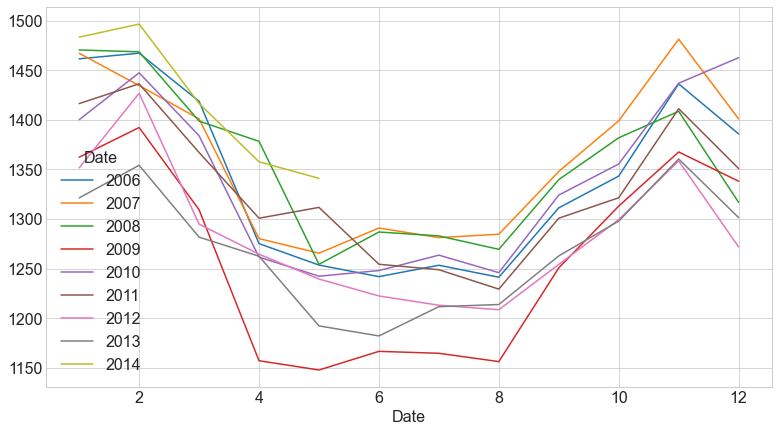

In [92]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [93]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


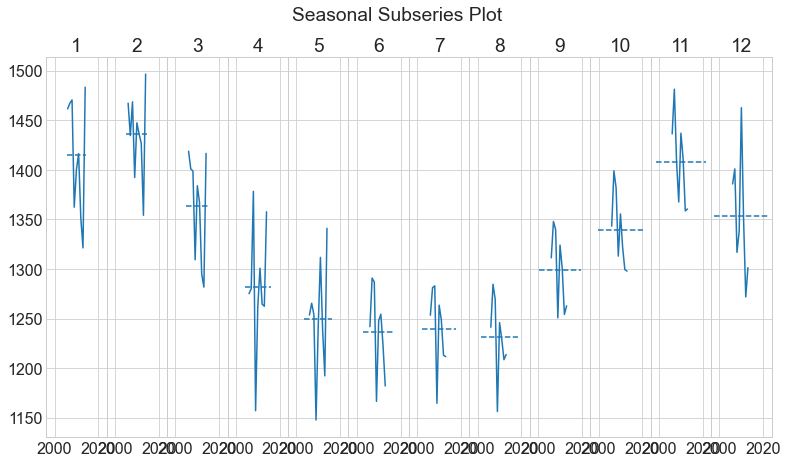

In [95]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

----

### Lag Plot

---

In [96]:
y.shift(-1)

Date
2006-01-01    1380.521
2006-01-02    1442.533
2006-01-03    1457.217
2006-01-04    1477.131
2006-01-05    1403.427
                ...   
2014-05-22    1429.832
2014-05-23    1199.258
2014-05-24    1089.246
2014-05-25    1429.811
2014-05-26         NaN
Name: Consumption, Length: 3068, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

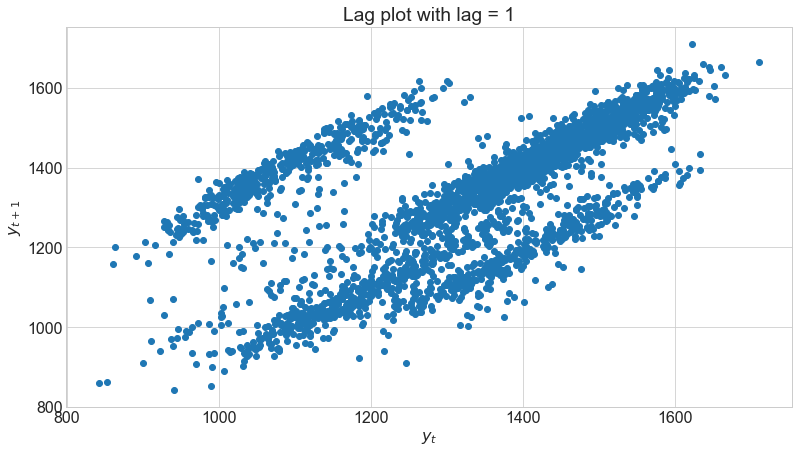

In [97]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='Consumption', ylabel='consump_next_day'>

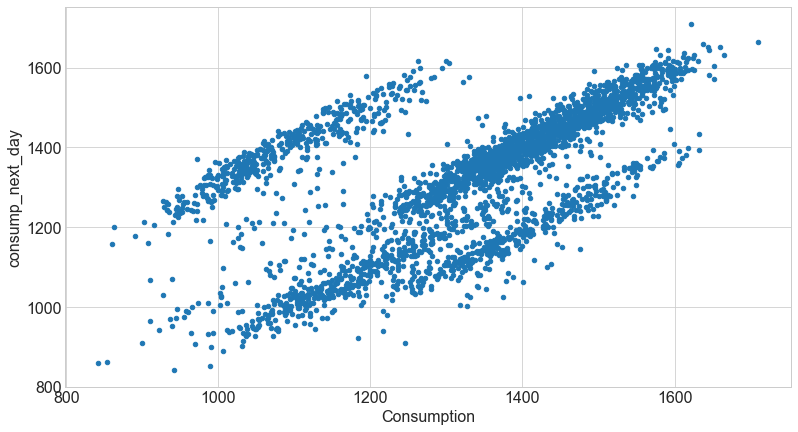

In [100]:
daily = train.resample('D').mean()
daily['consump_next_day'] = daily.Consumption.shift(-1)
daily.plot.scatter(x='Consumption', y='consump_next_day')

---

### Auto-correlation 

---


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

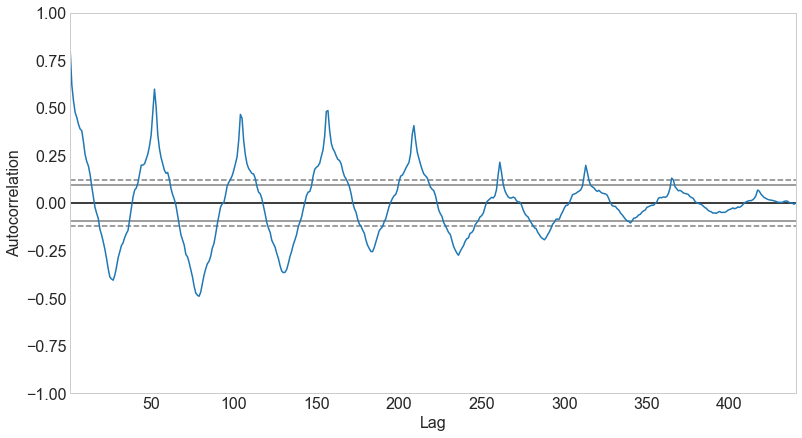

In [103]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

### Seasonal Decomposition


$$ y = S + T + \epsilon $$

Seasonality + Trend + Residual

In [112]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [113]:
result.seasonal

Date
2006-01-01    -68.437315
2006-01-08   -125.834756
2006-01-15     35.842411
2006-01-22    106.451350
2006-01-29    122.022124
                 ...    
2014-05-04    -51.595521
2014-05-11    -70.838419
2014-05-18    -82.722992
2014-05-25    -71.914027
2014-06-01   -104.766819
Freq: W-SUN, Name: seasonal, Length: 440, dtype: float64

In [114]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<AxesSubplot:xlabel='Date'>

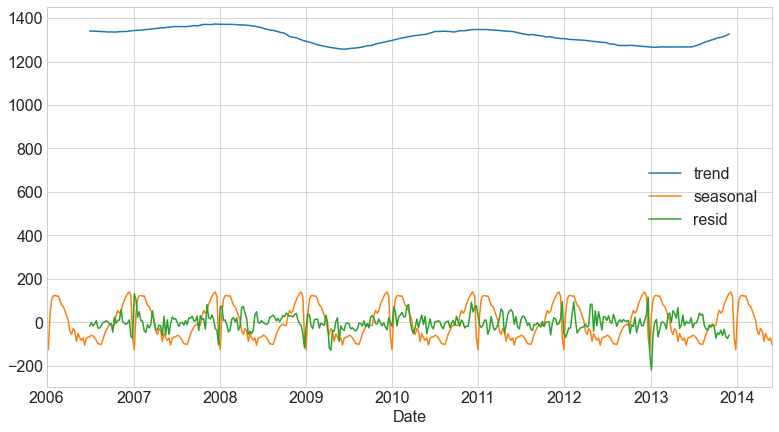

In [115]:
decomposition.iloc[:, 1:].plot()

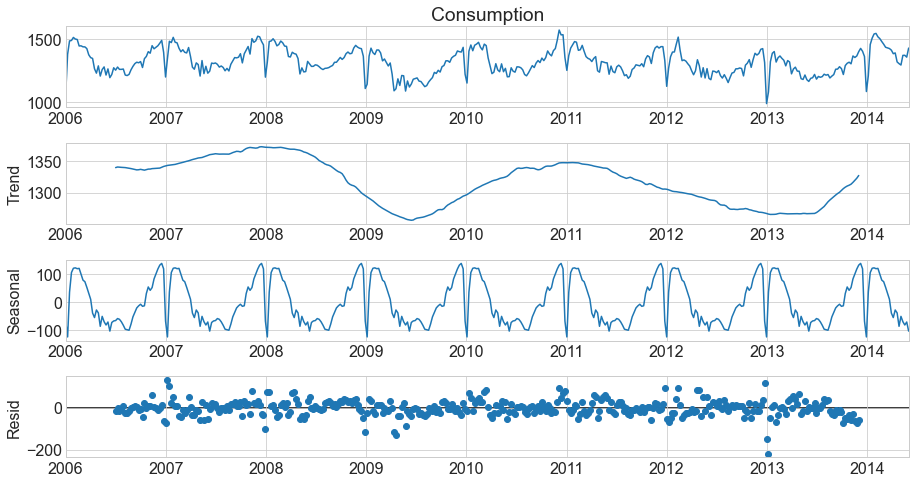

In [116]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None